# Tutorial for working with the DESI MWS VAC DR1

Here we briefly demonstrate how to use the Milky Way Survey Value Added Catalogue for 
DESI Data Release 1.

Here we will use the combined file

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/mwsall-pix-iron.fits

the individual survey/program files: 
https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/rvpix-main-bright.fits

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/sp_output/240520/sppix-main-bright.fits


And individual exposures table
https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240521/rvpix_exp-sv3-bright.fits

And some individual files for stars in a given healpixel:

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/healpix/main/bright/108/10813/rvtab_coadd-main-bright-10813.fits

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/healpix/main/bright/108/10813/rvmod_coadd-main-bright-10813.fits




In [3]:
import astropy.table as atpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Main catalogue

Here we read the combined table that most of the infromation. 
This table consists from several extensions that contain different information

1) RVTAB extension: RVSpecfit pipeline
2) SPTAB extension: FERRE pipeline
3) GAIA extension: Gaia parameters
4) FIBERMAP extension: table of targeting information
5) SCORES extension: spectra quality columns



In [5]:
RV_T=atpy.Table().read('data/mwsall-pix-iron.fits', 'RVTAB')
SP_T=atpy.Table().read('data/mwsall-pix-iron.fits', 'SPTAB')
G_T=atpy.Table().read('data/mwsall-pix-iron.fits', 'GAIA')
FM_T=atpy.Table().read('data/mwsall-pix-iron.fits', 'FIBERMAP')
SC_T=atpy.Table().read('data/mwsall-pix-iron.fits', 'SCORES')


In [7]:
# Selecting sources that are
# are 
# 1) primary (i.e. the best observation if the object was observed in more than one survey/program
# 2) have no RVS warning flags
# 3) are classified as star by redrock 

main_sel = RV_T['PRIMARY'] & (RV_T['RVS_WARN']==0) & (RV_T['RR_SPECTYPE']=='STAR')


# Sky distribution

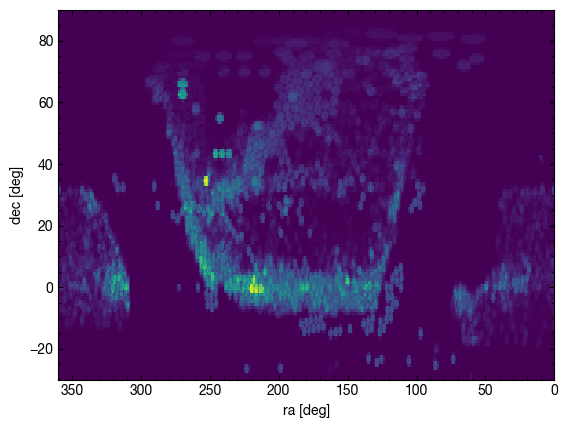

In [10]:
plt.hist2d(RV_T['TARGET_RA'][main_sel],RV_T['TARGET_DEC'][main_sel],bins=[360,120],range=[[0,360],[-30,90]]);
plt.xlabel('ra [deg]')
plt.xlim(360,0)
plt.ylabel('dec [deg]');

# Multiple surveys/programs

The catalogue consists measurements from multiple surveys/programs.

The main survey with the most stars are survey main, program bright and backup.
But there are some stars observed in dark program as well.

In [29]:
# Colour-magnitude distribution by survey/program
print ('surveys', 
       np.unique(RV_T['SURVEY'][:]))
print ('program', 
       np.unique(RV_T['PROGRAM'][:]))

surveys  SURVEY
-------
    cmx
   main
special
    sv1
    sv2
    sv3
program PROGRAM
-------
 backup
 bright
   dark
  other


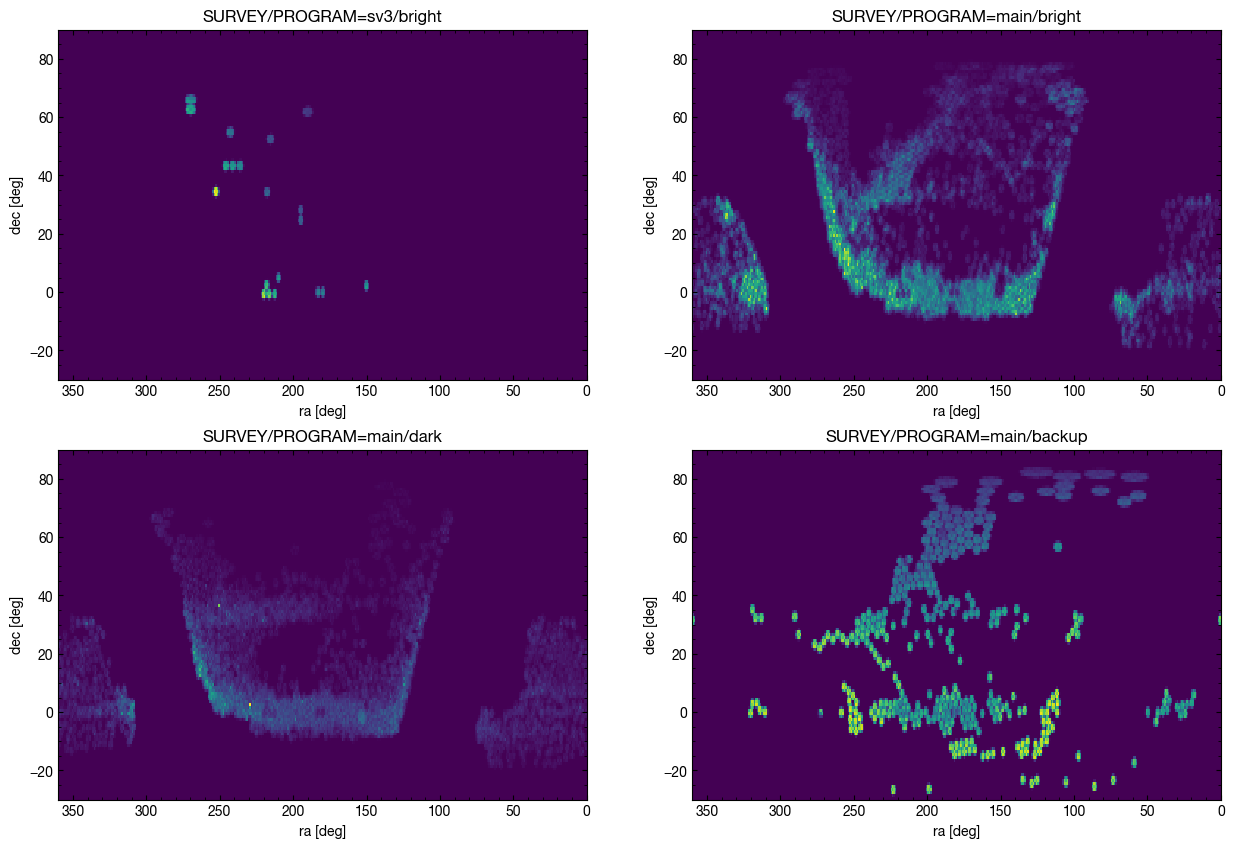

In [30]:
plt.figure(1,figsize=(15,10))
cnt=0
for survey, program in [('sv3','bright'),('main','bright'), ('main','dark'), ('main','backup')]:
    cur_sel = main_sel & (RV_T['SURVEY']==survey) & (RV_T['PROGRAM']==program)
    plt.subplot(2,2,cnt+1)
    plt.hist2d(RV_T['TARGET_RA'][cur_sel],RV_T['TARGET_DEC'][cur_sel],bins=[360,120],range=[[0,360],[-30,90]]);
    cnt+=1
    plt.title(f'SURVEY/PROGRAM={survey}/{program}')
    plt.xlabel('ra [deg]')
    plt.xlim(360,0)
    plt.ylabel('dec [deg]');